# Qui êtes-vous ?
<div class="alert alert-block alert-info">
Écrire ci-dessous votre nom, prénom et numéro étudiant :
</div>

Bouchouchi Nour 28600211  
Borchani Sofia 2828600211

# TME 03 - Opérateurs d'agrégation et LIME

In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations


## A - Opérateurs d'agrégation

<div class="alert alert-block alert-warning">
L'objet de la 1ère partie de TME est de tracer les lignes de niveaux des opérateurs d'agrégation vus en cours
</div>

<div class="alert alert-block alert-info">
    Ecrire une fonction qui calcule la moyenne pondérée d'un vecteur <code>x</code> en fonction d'un vecteur <code>poids</code>
</div>

In [217]:
def moyenne_ponderee(x, poids):
    return np.sum(x*poids.T)/ np.sum(poids)
    

In [218]:
x = np.random.randint(20, size=5)
print("x : ", x)
poids = np.random.random(5)
print("poids : ", poids)

print("moyenne pondérée : ", moyenne_ponderee(x, poids))

x :  [ 8 15 10 19 13]
poids :  [0.59854199 0.55910983 0.7430545  0.09113887 0.41003934]
moyenne pondérée :  11.519154220951135


<div class="alert alert-block alert-info">
    Ecrire une fonction qui trace les lignes de niveaux d'un opérateur, en l'appliquant à des vecteurs de taille 2.
</div>

In [219]:
def lignes_niveaux(operateur):
    x1 = np.linspace(0.,1.)
    x2 = np.linspace(0.,1.)

    X, Y = np.meshgrid(x1, x2)
    Z = operateur(X,Y)
    plt.figure()
    plt.pcolormesh(X, Y, Z) 
    plt.show()

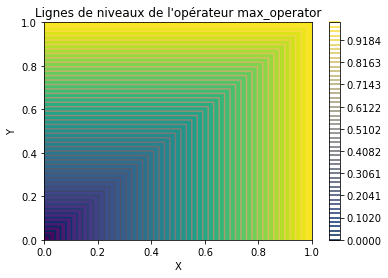

In [220]:
def lignes_niveaux(operateur):
    x1 = np.linspace(0, 1, 500)
    x2 = np.linspace(0, 1, 500)

    X, Y = np.meshgrid(x1, x2)
    Z = operateur(X, Y)

    levels = np.linspace(Z.min(), Z.max(), 50)
    plt.contourf(X, Y, Z, levels=levels, cmap='viridis')
    plt.contour(X, Y, Z, levels=levels, cmap='cividis')
    plt.colorbar()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Lignes de niveaux de l\'opérateur {operateur.__name__}')
    plt.show()

def max_operator(x, y):
    return np.maximum(x, y)

def min_operator(x, y):
    return np.minimum(x, y)

def mult_operator(x,y):
    return x*y

def max_zero_operator(x,y):
    return np.maximum(x+y-1, 0)

def min_un_operator(x,y):
    return np.minimum(x+y, 1)

def agg_disj_operator(x,y):
    return x+y-x*y

lignes_niveaux(max_operator)


<div class="alert alert-block alert-info">
    Ecrire une fonction qui calcule un OWA d'un vecteur <code>x</code> en fonction d'un vecteur <code>poids</code>
</div>

In [221]:
def owa(x, poids):
    x = np.sort(x)
    return np.sum(x*poids.T)/np.sum(poids)

In [222]:
x = np.random.randint(20, size=5)
print("x : ", x)
poids = np.random.random(5)
print("poids : ", poids)

print("OWA : ", owa(x, poids))

x :  [16 12 17  3  4]
poids :  [0.57151505 0.35251009 0.1143399  0.6417301  0.22790783]
OWA :  9.7687368780256


<div class="alert alert-block alert-info">
    Visualiser les lignes de niveaux de différentes configurations des moyennes pondérées et des OWA pour différents vecteurs de poids.    
</div>

In [223]:
def lignes_niveaux_owa(poids):
    x1 = np.linspace(0, 1, 500)
    x2 = np.linspace(0, 1, 500)

    X, Y = np.meshgrid(x1, x2)
    Z = np.zeros_like(X)

    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            Z[i, j] = owa([X[i, j], Y[i, j]], poids)

    levels = np.linspace(Z.min(), Z.max(), 50)
    plt.contourf(X, Y, Z, levels=levels, cmap='viridis')
    plt.contour(X, Y, Z, levels=levels, cmap='cividis')
    plt.colorbar()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Lignes de niveaux de l\'OWA avec poids {poids}')
    plt.show()

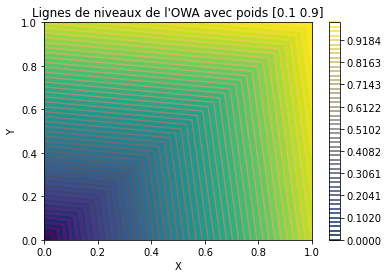

In [224]:
poids = np.array([0.1, 0.9])

lignes_niveaux_owa(poids)

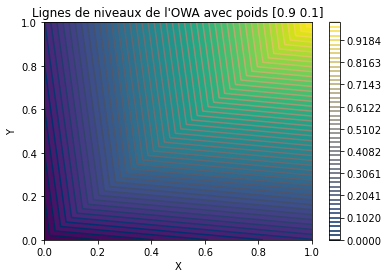

In [225]:
poids = np.array([0.9, 0.1])

lignes_niveaux_owa(poids)

<div class="alert alert-block alert-info">
    Visualiser aussi les lignes de niveaux des opérateurs conjonctifs et disjonctifs vus en cours, ainsi que l'opérateur à comportement variable (intégrale de Gödel), après avoir défini les fonctions permettant de calculer ces opérateurs.
</div>

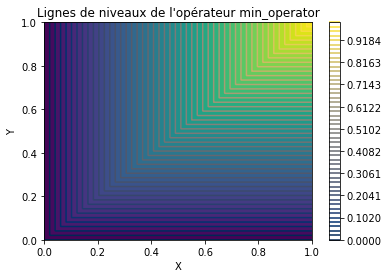

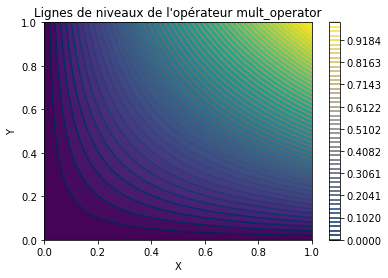

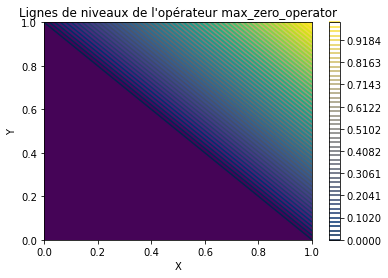

In [226]:
lignes_niveaux(min_operator)
lignes_niveaux(mult_operator)
lignes_niveaux(max_zero_operator)

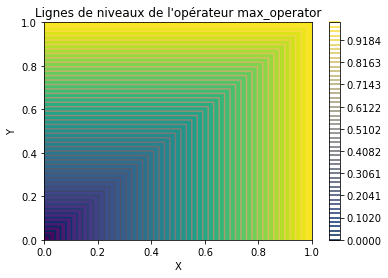

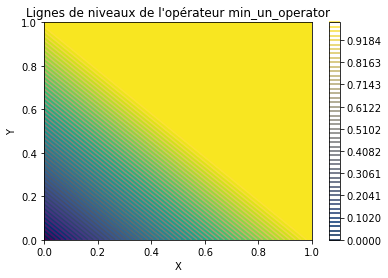

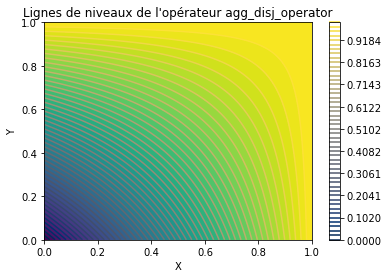

In [227]:
lignes_niveaux(max_operator)
lignes_niveaux(min_un_operator)
lignes_niveaux(agg_disj_operator)

<div class="alert alert-block alert-info">
    Ecrire une fonction qui calcule l'intégrale de Choquet d'un vecteur <code>x</code> en fonction d'une capacité <code>mu</code>.<br>
    La fonction ne doit pas imposer de restriction au nombre de composantes de <code>x</code>, sa documentation doit expliciter la représentation choisie pour <code>mu</code>, la fonction doit inclure une vérification que <code>mu</code> satisfait les propriétés d'une capacité.
    
</div>

In [228]:
def generate_combinaison(liste):
    l = list(liste)
    combinaisons = []
    for i in range(len(l) + 1):
        for c in combinations(l, i):
            combinaisons.append(list(c))
    return combinaisons


In [267]:
def check_val(elem, dico, mu):
    if mu>1 or mu<0: 
        return False
    liste = generate_combinaison(elem)
    for l in liste[1:-1] : 
        if dico[str(l)]>mu :
            print("valeur non conforme") 
            return False
    print(str(elem)+" : "+str(mu))
    return True

In [354]:
def create_dico(liste):
    dico = {}

    x = list(np.argsort(liste)+1)
    liste = generate_combinaison(x)    
    
    dico["[]"]=0
    print("[] : ",0)

    dico[str(liste[-1])]=1.0

    for elem in liste[1:-1]:
        mu = -1
        while (not check_val(elem, dico, mu)): 
            mu = input('entrer mu compris entre 0 et 1 pour '+str(elem)+" :")
            mu = float(mu)
        dico[str(elem)]= mu


    return dico


In [318]:
dico_mu = create_dico([18,16])

[] :  0
[2] : 0.5
[1] : 0.5
[2, 1] : 1.0

 {'[]': 0, '[2, 1]': 1.0, '[2]': 0.5, '[1]': 0.5}


In [409]:
def integrale_choquet(x, dico_mu):
    argsort = np.argsort(x)+1
    x = np.sort(x)
    res = 0
    for i in range(len(x)):
        res += (dico_mu[str(list(argsort))] - dico_mu[str(list(argsort[1:]))]) * x[argsort[0]-1]

        argsort = argsort[1:]
    return res
    
    

In [411]:
liste = [18, 16]
dico_mu = create_dico(liste)
print()
integrale_choquet(liste, dico_mu)

[] :  0
[2] : 0.9
[1] : 0.5



17.0

<div class="alert alert-block alert-info">
    Visualiser les lignes de niveaux de différentes intégrales de Choquet, pour différentes valeurs des paramètres. 
</div>

<div class="alert alert-block alert-info">
    Commenter les résultats obtenus. 
</div>

<div>
</div>

In [ ]:
# Commentaire :

## B - LIME

<div class="alert alert-block alert-warning">
L'objet de cette 2ème partie de TME est de tester l'algorithme LIME sur une tâche de classification assez simple.
</div>

## 1 - Préparation du dataset


<div class="alert alert-block alert-warning">
    Nous allons utiliser les datasets <code>half-moons</code>, que vous savez manipuler, pour permettre la visualisation des résultats et <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)">UCI ML Breast Cancer Wisconsin (Diagnostic)</a> qui comporte plus d'attributs.
</div>

<div class="alert alert-block alert-info">
    Tout d'abord, exécuter le bloc ci-dessous pour importer la bibliothèque <code>datasets</code> de <code>sklearn</code>.
</div>

In [ ]:
from sklearn import datasets

<div class="alert alert-block alert-info">
    Exécuter le bloc suivant pour charger les données <code>breast_cancer</code>.
 </div>

In [ ]:
breast_cancer = datasets.load_breast_cancer()

<div class = "alert alert-block alert-info">
    Q1.1 - Visualiser le contenu de la variable <code>breast_cancer</code>.
</div>

<div class = "alert alert-block alert-info">
    Q1.2 - Définir les variables <code>X_train, X_test, y_train, y_test</code> avec <code>train_test_split</code> où vous utiliserez 25% des données pour le test.
</div>

<div class = "alert alert-block alert-info">
    Q1.3 - Définir la variable <code>feature_names</code> contenant la liste des caractéristiques dans ce dataset ainsi que les noms de classes dans la variable <code>target_names</code>.
</div>

## 2 - Apprentissage d'un modèle linéaire

<div class="alert alert-block alert-warning">
Nous allons apprendre la tâche de classification en utilisant un modèle de régression logistique.
</div>

<div class = "alert alert-block alert-info">
    Q2.1 - Apprendre un modèle <code>logreg</code> de régression logistique sur les données.
</div>

<div class = "alert alert-block alert-info">
    Q2.2 - Dans <code>y_pred</code>, calculer les prédictions sur les données de test.
</div>

<div class = "alert alert-block alert-info">
    Q2.3 - Avec <code>confusion_matrix</code>, donner la matrice de confusion sur les données de test.
</div>

<div class = "alert alert-block alert-info">
    Q2.3 - Avec <code>f1_score</code>, calculer le score f1.
</div>

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='binary')

NameError: name 'y_test' is not defined

<div class = "alert alert-block alert-info">
    Q2.4 - En utilisant les labels des caractéristiques du dataset, dessiner un diagramme en barre de l'importance de chaque caractéristique apprise par la régression logistique.
</div>

<AxesSubplot: >

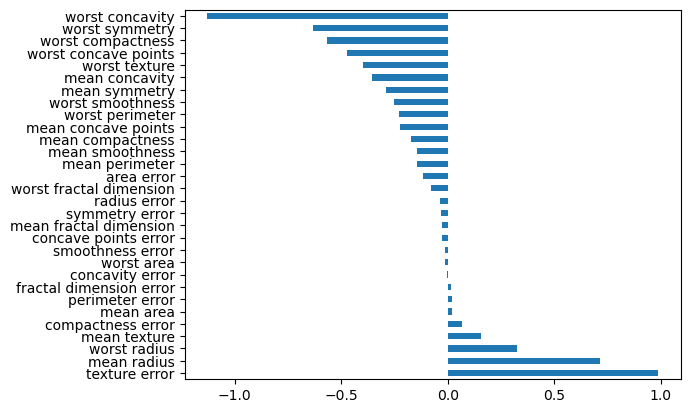

In [ ]:
import pandas as pd
coefs = logreg.coef_[0]
pd.Series(coefs, index=feature_names).nlargest(coefs.size).plot(kind='barh')

<div class = "alert alert-block alert-info">
    Q2.5 - De la même manière, donner les importances du premier exemple de la base de test.
</div>

<AxesSubplot: >

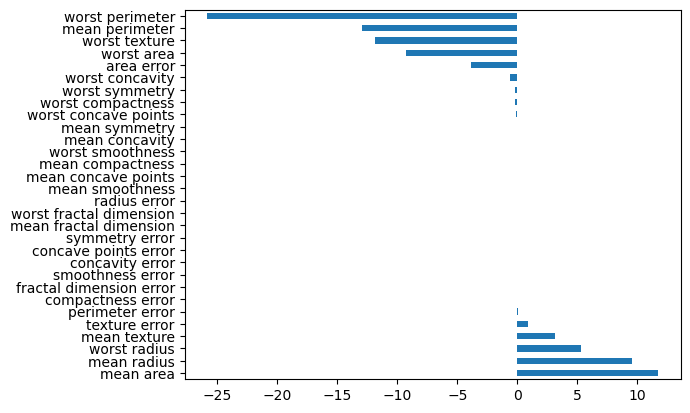

## 3 - Explication avec LIME

<div class="alert alert-block alert-warning">
Nous allons étudier une explication donnée par LIME.
</div>

<div class = "alert alert-block alert-info">
    Q3.1 - Exécuter le bloc ci-dessous pour obtenir une explication sur le premier exemple de la base de test. Commentez.
</div>

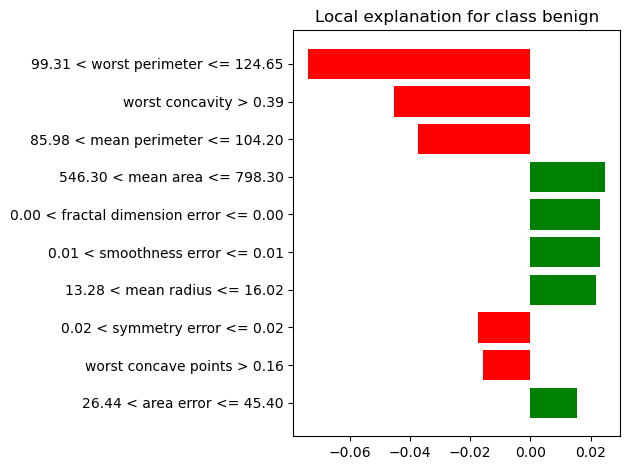

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
explainer = LimeTabularExplainer(X_test,
    feature_names=feature_names,
    class_names=target_names,
    categorical_features=[],
    mode='classification')

exp = explainer.explain_instance(X_test[0], logreg.predict_proba, num_features=10)

exp.as_pyplot_figure()
plt.tight_layout()

In [ ]:
# Commentaire :

<div class = "alert alert-block alert-info">
    Q3.2 - Comparer avec l'exemple suivant de la base de test.
</div>

## 4 - Expérimentations

<div class="alert alert-block alert-info">
    Faire des tests pour examiner le comportement de LIME, par exemple pour examiner sa stabilité par rapport à la donné d'intérêt ou par rapport au classifieur, selon un protocole que vous définirez après avoir spécifié l'étude que vous souhaitez mener.
</div>

## 5 - Données textuelles

<div class="alert alert-block alert-warning">
    Nous allons apprendre un modèle de classification random forest sur les données <code>fetch_20newsgroups</code> puis utiliser LIME pour obtenir des explications sur la classification d'exemples.
</div>

<div class = "alert alert-block alert-info">
À l'aide de la <a href="https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html#sphx-glr-auto-examples-text-plot-document-classification-20newsgroups-py">documentation du dataset fetch_20newsgroups</a>,  apprendre un modèle random forest de classification bi-classe de texte.
</div>

<div class = "alert alert-block alert-info">
Utilisez LIME pour obtenir des explications sur les prédictions obtenues sur des exemples.
    </div>

## 6 - Implémentation de LIME

<div class="alert alert-block alert-info">
    Sur des données textuelles, implémentez une version rudimentaire de LIME en utilisant la fonction de proximité proposée dans le cours. Retrouvez-vous les mêmes vecteurs d'importance qu'avec la bibliothèque LIME ?
</div>